In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

# client=pymongo.MongoClient("trainings.iptime.org",48003)
client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
tour_pass_review = db['data_tour_pass_review']
tour_pass_review = tour_pass_review.find()
tour_pass_review = pd.DataFrame(tour_pass_review)
data_tour_pass_review_tmon = db['data_tour_pass_review_tmon']
data_tour_pass_review_tmon = data_tour_pass_review_tmon.find()
data_tour_pass_review_tmon = pd.DataFrame(data_tour_pass_review_tmon)

In [2]:
df_tour_pass_review = pd.concat(objs=[tour_pass_review,data_tour_pass_review_tmon])

# tour_pass_review['date'] = tour_pass_review['date'][:4]

# 데이터 전처리

## 날짜 형식 변환

In [3]:
def date_format(raw):
    raw = raw.split('.')
    raw = '20'+raw[0]+raw[1]
    return raw
def year(raw):
    raw = raw[:4]
    return raw
def month(raw):
    raw = raw[4:]
    return raw
def month(raw):
    raw = raw[4:]
    return raw
df_tour_pass_review.loc[:,'date_format'] = df_tour_pass_review['date'].apply(date_format)
df_tour_pass_review.loc[:,'year'] = df_tour_pass_review['date_format'].apply(year)
df_tour_pass_review.loc[:,'month'] = df_tour_pass_review['date_format'].apply(month)
df_tour_pass_review

,_id,title,region,rating,date,content,date_format,year,month
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,202403,2024,03
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,202404,2024,04
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,202404,2024,04
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,202404,2024,04
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,202405,2024,05
...,...,...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,202404,2024,04
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,202404,2024,04
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,202403,2024,03
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,202403,2024,03


In [4]:
def year_count(raw):
    if int(raw) <= 202202:
        year = 1
    elif int(raw) <= 202302:
        year = 2
    else:
        year = 3
    return year
df_tour_pass_review.loc[:,'year_count'] = df_tour_pass_review['date_format'].apply(year_count)


In [5]:
df_tour_pass_review

,_id,title,region,rating,date,content,date_format,year,month,year_count
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,202403,2024,03,3
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,202404,2024,04,3
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,202404,2024,04,3
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,202404,2024,04,3
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,202405,2024,05,3
...,...,...,...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,202404,2024,04,3
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,202404,2024,04,3
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,202403,2024,03,3
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,202403,2024,03,3


## 결측치 제거

In [6]:
df_tour_pass_review.isnull().sum()

_id            0
title          0
region         0
rating         0
date           0
content        5
date_format    0
year           0
month          0
year_count     0
dtype: int64

In [7]:
df_tour_pass_review = df_tour_pass_review.dropna()

## 중복값 제거

In [8]:
df_tour_pass_review

,_id,title,region,rating,date,content,date_format,year,month,year_count
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,202403,2024,03,3
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,202404,2024,04,3
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,202404,2024,04,3
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,202404,2024,04,3
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,202405,2024,05,3
...,...,...,...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,202404,2024,04,3
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,202404,2024,04,3
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,202403,2024,03,3
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,202403,2024,03,3


In [9]:
df_tour_pass_review = df_tour_pass_review.drop_duplicates(['title','content','date','rating'],keep = 'first')
df_tour_pass_review

,_id,title,region,rating,date,content,date_format,year,month,year_count
0,663dea3806635b047a688c55,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.03.24.,남편과 갑작스럽게 가게 된 여수여행 둘다 여수는 처음이라 어디를 가야할지 무엇을 해...,202403,2024,03,3
1,663dea3806635b047a688c56,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,4,24.04.29.,저렴한 가격에 여러군데 둘러 볼수있어 좋았어요.\n다만 문을 일찍 닫거나 영업시간이...,202404,2024,04,3
2,663dea3806635b047a688c57,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.24.,아이들과함께 즐거운 여행하고 왔습니다. 사진보시면 어디어디 갔는지 알수있구요. 1...,202404,2024,04,3
3,663dea3806635b047a688c58,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.04.15.,아주 좋네요\n김경오파티쓰리에서 바다보며 아아 한잔 하고요...그닥 친절하진 않았어...,202404,2024,04,3
4,663dea3806635b047a688c59,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.05.02.,처음 이용해보았는데 가성비좋은것같습니다. 주말에이용하는데 체험하고 활동하는것은 주말...,202405,2024,05,3
...,...,...,...,...,...,...,...,...,...,...
1040,663edc33cf0309091221da84,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.25.,너무 좋았습니다!! 매장마다 친절하셨고 커피도 맛있었어요,202404,2024,04,3
1041,663edc33cf0309091221da85,"[강원] 강릉제로패스\n하슬라아트월드,선교장 무료입장",강원,5,24.04.18.,좋습니딘좋아요ㄲㅎㄲㄱ,202404,2024,04,3
1042,663edc6111e8110b348ba7de,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.24.,춘향테마파크가 운영을 안하고잇어서 아쉬웟네요,202403,2024,03,3
1043,663edc6111e8110b348ba7df,[주말에어디가] 전북투어패스\n남원춘향여행권,전북,5,24.03.07.,저럄하게 이용했어요 ㅎㅎ,202403,2024,03,3


## 2024년 3-5월 데이터 제거
- 3년치 데이터를 년도별로 비교하기 위해 202403부터 제거

In [10]:
df_tour_pass_review = df_tour_pass_review.query("date_format < '202403'")

# 데이터 확인

## 지역별 구매량
- 제주 > 전북 > 부산 > 강원 > 전남 > 충남

In [11]:
df_tour_pass_review['region'].value_counts()

region
제주    15270
전북     3790
부산     3567
강원     1028
전남      496
충남      176
Name: count, dtype: int64

In [12]:
df_tour_pass_review['date_format'].value_counts()

date_format
202208    1352
202308    1201
202206    1191
202310     995
202401     943
202210     893
202402     867
202209     863
202211     860
202311     840
202207     833
202312     827
202309     806
202205     799
202303     750
202302     730
202305     704
202306     695
202212     687
202301     650
202202     601
202203     598
202204     594
202304     589
202307     581
202201     565
202111     455
202105     454
202110     418
202112     373
202109     321
202106     319
202107     298
202108     296
202104     293
202103      86
Name: count, dtype: int64

## 투어패스 구매량의 변화 추이
- 월별로 구매량이 변화하기 때문에 월별 변화 추이를 확인해볼 필요가 있음

In [13]:
pivot_review = pd.pivot_table(df_tour_pass_review,index=['year_count','month','date_format','region'],values='content',aggfunc='count')
pivot_review = pivot_review.reset_index()

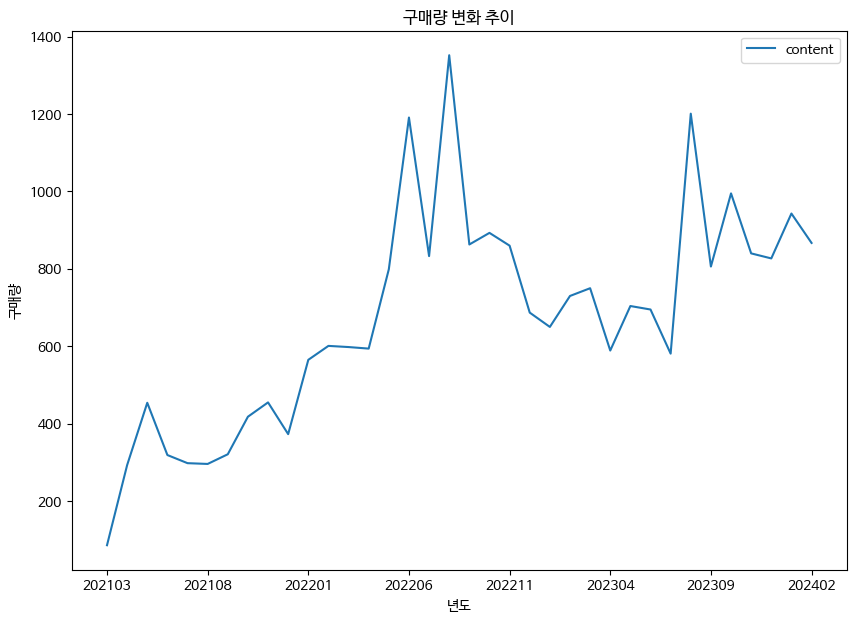

In [14]:
pivot_review_month = pd.pivot_table(pivot_review,index='date_format',values='content',aggfunc='sum')
ax = pivot_review_month.plot(kind='line',  figsize=(10, 7))

plt.title("구매량 변화 추이")
plt.xlabel("년도")	
plt.ylabel("구매량")	
plt.show()	


## 년차별 구매량 변화 추이
- 1년차에 비해 2년차에 구매량이 상당히 증가하였고 3년차에도 2년차와 비슷한 수준을 유지함

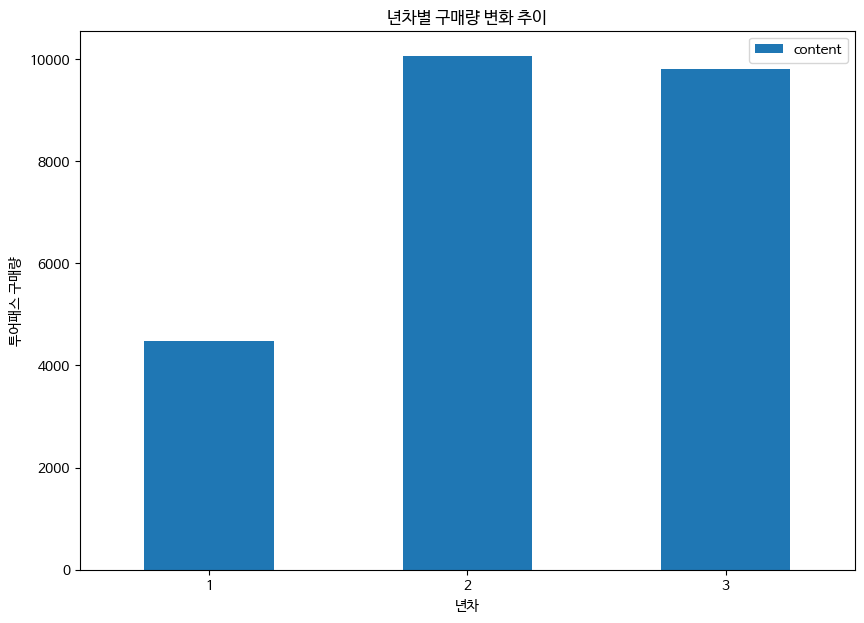

In [15]:
pivot_review_year = pd.pivot_table(pivot_review,index='year_count',values='content',aggfunc='sum')
ax = pivot_review_year.plot(kind='bar',  figsize=(10, 7))
plt.title('년차별 구매량 변화 추이')
plt.xlabel('년차')
plt.ylabel('투어패스 구매량')
plt.xticks(rotation=0)

plt.show()

## 월별 구매량 변화 추이
- 휴가가 많은 8월에 상당수 구매한 것을 확인

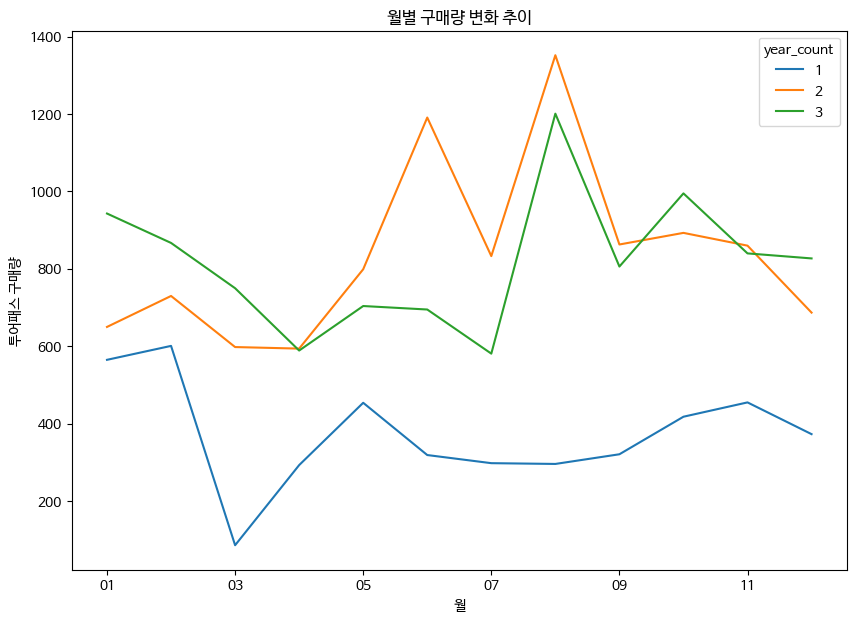

In [16]:
pivot_review_month = pd.pivot_table(pivot_review,index='month',columns='year_count',values='content',aggfunc='sum')
ax = pivot_review_month.plot(kind='line',  figsize=(10, 7))
plt.title('월별 구매량 변화 추이')
plt.xlabel('월')
plt.ylabel('투어패스 구매량')
plt.show()

In [17]:
# 텍스트 파일 경로
file_path = '../naver_shopping.txt'

# 텍스트 파일 읽기
with open(file_path, 'r') as file:
    text_data = file.read()
import pandas as pd
from io import StringIO

# 텍스트 데이터를 파일 객체로 변환
file_obj = StringIO(text_data)

# 데이터프레임 생성
train_data = pd.read_csv(file_obj, sep='\t')

In [18]:
train_data.query("label == 5")

,label,document
0,5,배공빠르고 굿
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
10,5,사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ
14,5,촉감도 좋고 무게감이나 핏도 편합니다
...,...,...
199993,5,포장이 넘 놀라웠으나 ㅎㅎ 상한곳없이 와 다행이네요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [19]:
def replace(text):
    text = text.replace('/n',' ')
    return text

In [20]:
df_tour_pass_review.loc[:,'review_clean_okt'] = df_tour_pass_review['content'].apply(replace)
df_tour_pass_review['review_clean_okt']

/tmp/ipykernel_57918/2101964802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tour_pass_review.loc[:,'review_clean_okt'] = df_tour_pass_review['content'].apply(replace)


6       여수첫방문은아니라 라테라스랑 테디베어박물관만가도 득이라고해서 여수사는 분이 추천하셔...
12      🤍 진짜 생각보다 완전 대박이에요!! 여수 여행가는 지인이 있다면 완전 추천할거 같...
30      여수 1박2일 여행동안 투어패스 덕에 알차게 즐겼습니다!\n가격이 올랐다는 리뷰를 ...
41      가고자했던곳은 분명패스권에는 오픈이였는데 가보니 닫혀있고... 수리중이고..카트는하...
42      진작 알았으면 좋았을텐데 여수여행 매년 가는편인데 이렇게 좋은 여수패스를 이제야 알...
                              ...                        
1028                                        아주 좋은 혜택들입니다!
1029                                         너무재미나게 놀았습니다
1030                                           아주좋아요아주좋아요
1036                                        유용하게 잘 사용했습니다
1037                                        저렴히 잘사서 잘썼어요!
Name: review_clean_okt, Length: 24327, dtype: object

In [21]:
from konlpy.tag import Okt
okt = Okt()
# 조사, 어미, 구두점 같은 것을 제거
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] in ['Adjective', 'Noun', 'Verb', 'Punctuation', 'KoreanParticle','Number']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [22]:
train_data['document'] = train_data['document'].astype(str)
train_data['review_clean_okt'] = train_data['document'].apply(okt_clean)
df_tour_pass_review['review_clean_okt'] = df_tour_pass_review['review_clean_okt'].apply(okt_clean)

/tmp/ipykernel_57918/2789397710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tour_pass_review['review_clean_okt'] = df_tour_pass_review['review_clean_okt'].apply(okt_clean)


## 1,2점은 부정, 4,5점은 긍정으로 분류

In [23]:
train_data.loc[train_data.query("label in [1,2]").index,'goodorbad'] = -1
train_data.loc[train_data.query("label in [3]").index,'goodorbad'] = 0
train_data.loc[train_data.query("label in [4,5]").index,'goodorbad'] = 1

In [24]:
train_data.query("label in [3]")

,label,document,review_clean_okt,goodorbad


In [25]:
labeling_training = train_data.query("goodorbad != 0")
labeling_training['goodorbad'].value_counts()

goodorbad
-1.0    100037
 1.0     99963
Name: count, dtype: int64

# 학습, 테스트, 검증 데이터 분류

In [26]:
train_feature = labeling_training['review_clean_okt']
train_target = labeling_training['goodorbad']

In [27]:
# train, test 나누기
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(train_feature, train_target, test_size=0.3, random_state=42)

# 벡터화하기

In [28]:
feature_train

21269     충전기 구매 하다 디자인 나쁘다 않다 깔끔하다 꽂다 부분 전기 오르다 ㅜㅜ 깜짝 놀...
187660                     배송 무지 빠르다 ! 제품 저희 아빠 쓸다 좋다 하다 ^^
774                                            득 득 득 하다 득 득
184577                                      어깨 끈 최대로 줄이다 기다
37127                                   이쁘다 마감 좀더 깔끔하다 좋다 .
                                ...                        
119879    교환 배송 과정 매끄럽다 하다 번거롭다 .. 지난주 수욜날 보내다 하다 제품 송장 ...
103694    재다 다시다 주문 하다 시르다 실수 당연하다 사랑 하다 강아지 키우다 사람 상업 목...
131932                                 데크 팩 비너 박스 그냥 섞이다 오다
146867                                           짐승 용량 만족하다
121958    사지 말다 여기 , 냄새 나다 싸다 티나 , 허다 술함 경상도 아지 매 전화 매우 ...
Name: review_clean_okt, Length: 140000, dtype: object

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
feature_train = tfidfVectorizer.fit_transform(feature_train)
feature_train.toarray()[:2]
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['00', '00 뜨다', '00 욕조', ..., '힞들어 뵬루', '힞싲', '힞싲 ㅡㅅㄱㅅㄷㅂㄱㅅㄷㅂㄱㅅㄷ'],
      dtype=object)

In [30]:
feature_test = tfidfVectorizer.transform(feature_test)

# 긍, 부정 분류 모델 선택하기
- 가장 높은 성능을 보인 SVC 선택

### randomforestclassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [44]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [45]:
target_train_predict = classification_topic.predict(feature_train)

In [46]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99     70069
         1.0       0.99      1.00      0.99     69931

    accuracy                           0.99    140000
   macro avg       0.99      0.99      0.99    140000
weighted avg       0.99      0.99      0.99    140000



In [47]:
target_test_predict = classification_topic.predict(feature_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

        -1.0       0.88      0.87      0.88     29968
         1.0       0.88      0.88      0.88     30032

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



### logisticRegression

In [49]:
from sklearn import linear_model
logisticRegression=linear_model.LogisticRegression()

In [50]:
logisticRegression.fit(feature_train,target_train)

LogisticRegression()

In [51]:
target_train_predict = logisticRegression.predict(feature_train)

In [52]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

        -1.0       0.93      0.93      0.93     70069
         1.0       0.93      0.92      0.93     69931

    accuracy                           0.93    140000
   macro avg       0.93      0.93      0.93    140000
weighted avg       0.93      0.93      0.93    140000



In [53]:
target_test_predict = logisticRegression.predict(feature_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

        -1.0       0.89      0.90      0.89     29968
         1.0       0.90      0.89      0.89     30032

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



### randomforestclassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)

In [56]:
classification_topic.fit(feature_train, target_train)

RandomForestClassifier(n_jobs=-1)

In [57]:
target_train_predict = classification_topic.predict(feature_train)

In [58]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99     70069
         1.0       0.99      1.00      0.99     69931

    accuracy                           0.99    140000
   macro avg       0.99      0.99      0.99    140000
weighted avg       0.99      0.99      0.99    140000



In [59]:
target_test_predict = classification_topic.predict(feature_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

        -1.0       0.88      0.88      0.88     29968
         1.0       0.88      0.88      0.88     30032

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



### K-Nearest Neighbors

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [62]:
knn.fit(feature_train, target_train)

KNeighborsClassifier()

In [63]:
target_train_predict = knn.predict(feature_train)

In [64]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

        -1.0       0.69      0.86      0.77     70069
         1.0       0.81      0.61      0.70     69931

    accuracy                           0.74    140000
   macro avg       0.75      0.74      0.73    140000
weighted avg       0.75      0.74      0.73    140000



In [65]:
target_test_predict = knn.predict(feature_test)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

        -1.0       0.59      0.75      0.66     29968
         1.0       0.66      0.48      0.56     30032

    accuracy                           0.62     60000
   macro avg       0.63      0.62      0.61     60000
weighted avg       0.63      0.62      0.61     60000



### Support Vector Machine

In [33]:
from sklearn import svm
svm_model = svm.SVC()

In [34]:
svm_model.fit(feature_train, target_train)

SVC()

In [35]:
target_train_predict = svm_model.predict(feature_train)

In [36]:
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(target_train, target_train_predict))

              precision    recall  f1-score   support

        -1.0       0.98      0.97      0.98     70069
         1.0       0.97      0.98      0.98     69931

    accuracy                           0.98    140000
   macro avg       0.98      0.98      0.98    140000
weighted avg       0.98      0.98      0.98    140000



In [37]:
target_test_predict = svm_model.predict(feature_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_predict))

              precision    recall  f1-score   support

        -1.0       0.89      0.90      0.90     29968
         1.0       0.90      0.89      0.90     30032

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



In [48]:
import pickle
with open('svm_model.pkl','wb') as pickle_file:   # pickle에 저장
  pickle.dump(obj=svm_model,file=pickle_file)

In [49]:
import pickle
with open('tfidfVectorizer.pkl','wb') as pickle_file:   # pickle에 저장
  pickle.dump(obj=tfidfVectorizer,file=pickle_file)

# 투어패스 구매후기 데이터에 적용

## 전체 데이터의 긍,부정 분류

In [50]:
features=tfidfVectorizer.transform(df_tour_pass_review['review_clean_okt'])

In [51]:
df_tour_pass_review['goodorbad'] = svm_model.predict(features)

In [52]:
df_tour_pass_review = df_tour_pass_review.reset_index()

In [53]:
df_tour_pass_review = df_tour_pass_review.loc[:,'title':]
df_tour_pass_review

,title,region,rating,date,content,date_format,year,month,year_count,review_clean_okt,goodorbad
0,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.01.30.,여수첫방문은아니라 라테라스랑 테디베어박물관만가도 득이라고해서 여수사는 분이 추천하셔...,202401,2024,01,3,방문 아니다 라테라 스랑 테디베어 박물관 가도 득 하다 수사 분 추천 하다 구매 하...,1.0
1,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.01.03.,🤍 진짜 생각보다 완전 대박이에요!! 여수 여행가는 지인이 있다면 완전 추천할거 같...,202401,2024,01,3,진짜 생각 완전 대박 !! 여수 여행가 지인 있다 완전 추천 하다 같다 !!\ \ ...,1.0
2,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,23.12.18.,여수 1박2일 여행동안 투어패스 덕에 알차게 즐겼습니다!\n가격이 올랐다는 리뷰를 ...,202312,2023,12,3,여수 1 박 2일 여행 동안 투어 패스 덕 알차다 즐기다 !\ 가격 오르다 리뷰 보...,1.0
3,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,1,24.02.21.,가고자했던곳은 분명패스권에는 오픈이였는데 가보니 닫혀있고... 수리중이고..카트는하...,202402,2024,02,3,가다 하다 곳 분명 패스 오픈 이다 가보다 닫히다 ... 수리 .. 카트 늘다 .....,-1.0
4,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,5,24.01.08.,진작 알았으면 좋았을텐데 여수여행 매년 가는편인데 이렇게 좋은 여수패스를 이제야 알...,202401,2024,01,3,진작 알다 좋다 여수 여행 매년 가다 편 좋다 패스 이제야 알다 ! 아이 가보다 곳...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
24322,[주말에어디가] 강릉프리패스 강릉투어패스\n단독특가,강원,5,23.12.22.,아주 좋은 혜택들입니다!,202312,2023,12,3,아주 좋다 혜택 들이다 !,1.0
24323,[주말에어디가] 강릉프리패스 강릉투어패스\n단독특가,강원,5,23.12.05.,너무재미나게 놀았습니다,202312,2023,12,3,재미나 놀다,-1.0
24324,[주말에어디가] 강릉프리패스 강릉투어패스\n단독특가,강원,5,23.11.18.,아주좋아요아주좋아요,202311,2023,11,3,아주 좋다 아주 좋다,1.0
24325,[주말에어디가] 강릉N투어패스\n무료 혜택 제공 시설로만\n이루어진 부담없는 강릉여행,강원,5,24.02.27.,유용하게 잘 사용했습니다,202402,2024,02,3,유용하다 자다 사용 하다,1.0


## 별점 1,2점은 부정, 4,5점은 긍정으로 재분류

In [54]:
df_tour_pass_review['rating'] = df_tour_pass_review['rating'].astype('int')
df_tour_pass_review.loc[df_tour_pass_review.query("rating == 4").index,'goodorbad'] = 1
df_tour_pass_review.loc[df_tour_pass_review.query("rating == 5").index,'goodorbad'] = 1
df_tour_pass_review.loc[df_tour_pass_review.query("rating == 1").index,'goodorbad'] = -1
df_tour_pass_review.loc[df_tour_pass_review.query("rating == 2").index,'goodorbad'] = -1


In [55]:
df_tour_pass_review['goodorbad'].value_counts()

goodorbad
 1.0    23856
-1.0      471
Name: count, dtype: int64

In [56]:
df_tour_pass_bad = df_tour_pass_review.query("goodorbad == -1")
df_tour_pass_bad['rating'].value_counts()

rating
3    251
1    136
2     84
Name: count, dtype: int64

In [57]:
df_tour_pass_good = df_tour_pass_review.query("goodorbad == 1")
df_tour_pass_good['rating'].value_counts()

rating
5    21420
4     2146
3      290
Name: count, dtype: int64

In [58]:
df_tour_pass_bad

,title,region,rating,date,content,date_format,year,month,year_count,review_clean_okt,goodorbad
3,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,1,24.02.21.,가고자했던곳은 분명패스권에는 오픈이였는데 가보니 닫혀있고... 수리중이고..카트는하...,202402,2024,02,3,가다 하다 곳 분명 패스 오픈 이다 가보다 닫히다 ... 수리 .. 카트 늘다 .....,-1.0
51,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.02.16.,구매하실때 청소년 소신있으시면 가격같다고 전부성인하시지마시고\n성인 청소년 소인 구...,202402,2024,02,3,구매 하다 때 청소년 소신 있다 가격 같다 전부 인하다 말다 \ 성인 청소년 소인 ...,-1.0
211,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.01.11.,이용 가능한 장소가 다양해서 좋았습니다. 하지만 한 번 이용 후 1시간 지나야 다시...,202401,2024,01,3,이용 가능하다 장소 다양하다 좋다 . 하다 번 이용 후 1시간 지나다 다시 이용 하...,-1.0
251,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,23.12.27.,솔직히 갈데가 거의 없습니다.\n좀더 다양했으면 좋겠어요,202312,2023,12,3,솔직하다 갈다 거의 없다 .\ 좀더 다양하다 좋다,-1.0
265,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,23.12.27.,마땅히 갈만한곳이 없었어요\n가격대비 그닥..,202312,2023,12,3,마땅하다 갈다 곳 없다 \ 가격 대비 그닥 ..,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
24280,[주말에어디가] 전북투어패스 통합이용권,전북,3,22.06.24.,"주말동안 전주 한옥마을, 동물원을 방문할 목적으로 구입하였습니다. 전주식물원에서 택...",202206,2022,06,2,"주말 동안 전주 옥 마을 , 동물원 방문 하다 목적 구입 하다 . 식물원 택시 비 ...",-1.0
24297,[주말에어디가] 전북투어패스 통합이용권,전북,2,22.05.19.,다음에 또 가고 싶습니다.,202205,2022,05,2,다음 또 가다 싶다 .,-1.0
24300,[충청] 청양 투어패스 24시간권,충남,2,24.01.30.,"제주, 전북, 인천 투어패스 여행해봤는데 청양은 다시는 안하고 싶어요... 관광을 ...",202401,2024,01,3,"제주 , 전북 , 인천 투어 패스 여행 해봤다 청양 다시다 안 싶다 ... 관광 대...",-1.0
24307,[충청] 청양 투어패스 24시간권,충남,3,23.11.22.,9월10월에 갈걸그랬네요. 식물원도 꽃볼게없어요,202311,2023,11,3,9월 10월 갈다 걸 그렇다 . 식물원 꽃볼 없다,-1.0


# 부정으로 분류된 댓글의 키워드 분석

In [59]:
df_tour_pass_bad = df_tour_pass_bad.reset_index()

In [60]:
df_tour_pass_bad = df_tour_pass_bad.loc[:,'title':]
df_tour_pass_bad

,title,region,rating,date,content,date_format,year,month,year_count,review_clean_okt,goodorbad
0,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,1,24.02.21.,가고자했던곳은 분명패스권에는 오픈이였는데 가보니 닫혀있고... 수리중이고..카트는하...,202402,2024,02,3,가다 하다 곳 분명 패스 오픈 이다 가보다 닫히다 ... 수리 .. 카트 늘다 .....,-1.0
1,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.02.16.,구매하실때 청소년 소신있으시면 가격같다고 전부성인하시지마시고\n성인 청소년 소인 구...,202402,2024,02,3,구매 하다 때 청소년 소신 있다 가격 같다 전부 인하다 말다 \ 성인 청소년 소인 ...,-1.0
2,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.01.11.,이용 가능한 장소가 다양해서 좋았습니다. 하지만 한 번 이용 후 1시간 지나야 다시...,202401,2024,01,3,이용 가능하다 장소 다양하다 좋다 . 하다 번 이용 후 1시간 지나다 다시 이용 하...,-1.0
3,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,23.12.27.,솔직히 갈데가 거의 없습니다.\n좀더 다양했으면 좋겠어요,202312,2023,12,3,솔직하다 갈다 거의 없다 .\ 좀더 다양하다 좋다,-1.0
4,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,23.12.27.,마땅히 갈만한곳이 없었어요\n가격대비 그닥..,202312,2023,12,3,마땅하다 갈다 곳 없다 \ 가격 대비 그닥 ..,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
466,[주말에어디가] 전북투어패스 통합이용권,전북,3,22.06.24.,"주말동안 전주 한옥마을, 동물원을 방문할 목적으로 구입하였습니다. 전주식물원에서 택...",202206,2022,06,2,"주말 동안 전주 옥 마을 , 동물원 방문 하다 목적 구입 하다 . 식물원 택시 비 ...",-1.0
467,[주말에어디가] 전북투어패스 통합이용권,전북,2,22.05.19.,다음에 또 가고 싶습니다.,202205,2022,05,2,다음 또 가다 싶다 .,-1.0
468,[충청] 청양 투어패스 24시간권,충남,2,24.01.30.,"제주, 전북, 인천 투어패스 여행해봤는데 청양은 다시는 안하고 싶어요... 관광을 ...",202401,2024,01,3,"제주 , 전북 , 인천 투어 패스 여행 해봤다 청양 다시다 안 싶다 ... 관광 대...",-1.0
469,[충청] 청양 투어패스 24시간권,충남,3,23.11.22.,9월10월에 갈걸그랬네요. 식물원도 꽃볼게없어요,202311,2023,11,3,9월 10월 갈다 걸 그렇다 . 식물원 꽃볼 없다,-1.0


In [147]:
# 토크나이징 함수 정의
stopwords = ['생각','추천','투어','패스','다음','요트']
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word == '사용':
                    word = '이용'
                if word == '어린이':
                    word = '아이'

                word_list.append(word)
    return " ".join(word_list)

In [148]:
df_tour_pass_bad.loc[:,'review_keword']=df_tour_pass_bad['content'].apply(Tokenizer)

In [149]:
df_tour_pass_bad_clean = df_tour_pass_bad.query("review_keword !=''")
df_tour_pass_bad_clean = df_tour_pass_bad_clean.reset_index()
df_tour_pass_bad_clean = df_tour_pass_bad_clean.loc[:,'title':]

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer_topic = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer_topic.fit_transform(df_tour_pass_bad_clean['review_keword'])
features.toarray()[:2]
dictionary_list = tfidfVectorizer_topic.get_feature_names_out()
dictionary_list

array(['가격', '가성', '거리', '결제', '경우', '계획', '고객', '구매', '구입', '금액', '기분',
       '느낌', '대부분', '대비', '동선', '라이트', '마감', '무료', '문의', '박물관', '방문',
       '브릭', '비용', '사람', '상품', '설명', '승마', '시간', '실망', '아이', '어묵', '업체',
       '여행', '열차', '예약', '예약 시간', '요금', '음료', '이득', '이상', '이용', '이용 시간',
       '이용 이용', '인기', '일정', '입장', '장소', '전화', '절대', '정도', '제한', '제휴',
       '조금', '직원', '처음', '체험', '최악', '추가', '추가 요금', '취소', '카트', '커피',
       '코스', '쿠폰', '타워', '티켓', '판매', '하루', '할인', '해당', '해변', '해변 열차',
       '혜택', '확인', '환불', '휴무'], dtype=object)

In [151]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_10 = LatentDirichletAllocation(n_components=3, random_state=36) #인스턴스화 #n_components 토픽의 갯수
lda_model_10.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda_model_10.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:20])# 시리즈 형식으로 출력 get values from series / index 
    topics_list.append(topics_text)
topics_list_add_10 = [['Topic1', 'Topic2','Topic3','Topic4','Topic5','Topic6','Topic7','Topic8','Topic9','Topic10',],topics_list]
df_topics_keywords_10 = pd.DataFrame(topics_list_add_10)
df_topics_keywords_10=df_topics_keywords_10.T
df_topics_keywords_10

,0,1
0,Topic1,시간 추가 여행 아이 예약 상품 요금 결제 동선 추가 요금 입장 확인 장소 라이트 가성 절대 티켓 이용 이용 설명 제휴
1,Topic2,구매 체험 업체 가격 사람 승마 박물관 카트 정도 예약 쿠폰 전화 휴무 제한 구입 이용 무료 판매 이상 경우
2,Topic3,이용 예약 방문 할인 기분 코스 금액 커피 거리 조금 혜택 느낌 계획 어묵 대부분 열차 취소 해변 환불 해변 열차
3,Topic4,None
4,Topic5,None
5,Topic6,None
6,Topic7,None
7,Topic8,None
8,Topic9,None
9,Topic10,None


In [152]:
list_topics = []
for i in range(len(lda_model_10.components_)):
    df_datas_0 = [lda_model_10.components_[i], dictionary_list]
    df_topics_0 = pd.DataFrame(data=df_datas_0).T
    df_topics_0 = df_topics_0.dropna()
    df_topics_0 = df_topics_0.sort_values(0, ascending=False).reset_index()
    df_topics_0.rename(columns = {1 : i+1}, inplace = True)
    df_topics_0.rename(columns = {0 : 'score'}, inplace = True)
    list_topics.append(df_topics_0.loc[:4,['score',i+1]])
df_topic = pd.concat(list_topics,axis=1)
df_topic

,score,1,score,2,score,3
0,30.790443,시간,21.997859,구매,55.865152,이용
1,22.729569,추가,16.486186,체험,14.748773,예약
2,18.080275,여행,14.579235,업체,9.362711,방문
3,12.744926,아이,13.362449,가격,9.158144,할인
4,11.812003,예약,10.243391,사람,8.778445,기분


In [153]:
import pyLDAvis
import pyLDAvis.lda_model
vis_10 = pyLDAvis.lda_model.prepare(lda_model_10,features,tfidfVectorizer_topic)
vis_10
pyLDAvis.enable_notebook()
components_10_display = pyLDAvis.display(vis_10)
components_10_display

In [154]:
# grid_best_model.fit(features)
import pandas as pd
pd.set_option('display.max_colwidth', None)
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda_model_10.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)

In [155]:
topics_output = lda_model_10.transform(features)
df_topics_score = pd.DataFrame(topics_output)
df_topics_score['dominant_topic_number']=np.argmax(topics_output, axis=1)
df_topics_score['dominant_topic_number'].value_counts()

dominant_topic_number
0    193
2    122
1    119
Name: count, dtype: int64

In [158]:
df_tour_pass_bad_clean.loc[:,'content_topic'] = df_topics_score['dominant_topic_number']
df_tour_pass_bad_clean.query("content_topic==0")

,title,region,rating,date,content,date_format,year,month,year_count,review_clean_okt,goodorbad,review_keword,content_topic
2,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.01.11.,"이용 가능한 장소가 다양해서 좋았습니다. 하지만 한 번 이용 후 1시간 지나야 다시 이용할 수 있어서 그건 좀 불편했습니다. 1시간, 너무 길어요. ㅠㅠ",202401,2024,01,3,"이용 가능하다 장소 다양하다 좋다 . 하다 번 이용 후 1시간 지나다 다시 이용 하다 수 있다 좀 불편하다 . 1시간 , 기다 . ㅠㅠ",-1.0,이용 장소 이용 이용,0
4,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.01.09.,ㅜㅜ5시이후 입장가능한 티켓이였습니다\n애들건 자유이용건이였거든요ㅜㅜ,202401,2024,01,3,ㅜㅜ 5시 입장 가능하다 티켓 이다 \ 애 들다 자유 용건 이다 ㅜㅜ,-1.0,입장 티켓 자유 용건,0
7,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,23.12.25.,매장 한번 사용 후 한시간동안 다른 매장 못갑니다 \n제 생각에는 별로인듯합니다,202312,2023,12,3,매장 한번 사용 후 시간 동안 다른 매장 가다 \ 제 생각 별로 듯 하다,-1.0,매장 이용 시간 동안 매장,0
11,[전북투어패스] 남원춘향여행권,전북,2,23.06.09.,춘향테마파크는 정말 화가나네요\n천문대나 광한루.지리산테마파크는 좋아요,202306,2023,06,3,추다 향 테마 파크 정말 화가 나다 \ 천문대 광한루 . 지리산 테마 파크 좋다,-1.0,테마 파크 화가 천문대 광한루 테마 파크,0
15,[전북투어패스] 남원춘향여행권,전북,3,22.10.08.,"어느\n장소 어디까지인지 잘 보고 가시기를\n남원 춘향권이\n춘향 스테이션 안 전체 일줄 알았는데,,\n그건 아닌걸로^^;;;",202210,2022,10,2,"\ 장소 어디 인지 자다 보고 가시 기르다 \ 남원 추다 향 \ 추다 향 스테이션 안 전체 이다 알다 ,,\ 아니다 걸 ^^;;;",-1.0,장소 인지 가시 남원 스테이션 전체,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,[부산] 부산투어패스 프리패스\n+ 해변열차 탑승권 패키지,부산,3,22.07.16.,시간짧고\n다양했으면합니다,202207,2022,07,2,시간 짧다 다양하다 하다,-1.0,시간,0
423,[부산] 부산투어패스 프리패스\n+ 해변열차 탑승권 패키지,부산,3,22.06.29.,예전보다 사용시간은 줄고 혜택이 줄어서\n아쉽기도 했지만...\n부산에서 즐거운 추억을 만들었어요.,202206,2022,06,2,예전 사용 시간 줄 혜택 줄다 아쉽다 기도 하다 ... 부산 즐겁다 추억 만들다 .,-1.0,예전 이용 시간 혜택 기도 추억,0
428,[주말에어디가] 전북투어패스 통합이용권,전북,3,23.08.04.,되는대가별로음슴...,202308,2023,08,3,되다 대가 별로 음슴다 ...,-1.0,대가,0
429,[주말에어디가] 전북투어패스 통합이용권,전북,3,23.04.04.,영업중이라 하여 갔는데 허탕쳤네요,202304,2023,04,3,영업 하다 가다 허탕 치다,-1.0,영업 허탕,0


In [159]:
df_tour_pass_bad_clean.query("content_topic==1")

,title,region,rating,date,content,date_format,year,month,year_count,review_clean_okt,goodorbad,review_keword,content_topic
1,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.02.16.,구매하실때 청소년 소신있으시면 가격같다고 전부성인하시지마시고\n성인 청소년 소인 구분해서 사세요 안그러면할인받고 타는것들 전부 성인가격으로 결제해야하네요,202402,2024,02,3,구매 하다 때 청소년 소신 있다 가격 같다 전부 인하다 말다 \ 성인 청소년 소인 구분 하다 사다 그렇다 할인 받다 타다 들다 전부 성인 가격 결제 하다,-1.0,구매 청소년 소신 가격 전부 성인 청소년 소인 구분 할인 전부 성인 가격 결제,1
3,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,23.12.27.,마땅히 갈만한곳이 없었어요\n가격대비 그닥..,202312,2023,12,3,마땅하다 갈다 곳 없다 \ 가격 대비 그닥 ..,-1.0,가격 대비,1
6,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,2,23.12.10.,ㅋㅋㅋ 서녹씨 딸기모찌 반구만 주는데 한구라고 떡하니 광고하는 클라쓰~ 다른 리뷰들도 계속 지적하는데도 안바꾸고 그냥 파네요 ㅋㅋㅋ 12월에 가격도 올라 이제 더이상 메리트 없음.,202312,2023,12,3,ㅋㅋㅋ 녹 딸기모찌 반구 주다 한구 광고 하다 크다 쓰다 ~ 다른 리뷰 계속 지적 하다 바꾸다 그냥 파네 ㅋㅋㅋ 12월 가격 오르다 이제 더 이상 메리트 없다 .,-1.0,딸기모찌 반구 광고 계속 지적 가격 이상 메리트,1
8,청양투어패스 / 충남 여행 칠갑산 관광지 명소 카페 체험 천문대,충남,2,24.01.14.,어린이 박물관 체험관은 있는데\n커피숍 소인 음료는 오히러 추가 금으로\n사먹야 하고 어른만 있으면 괜찮지만\n자녀들 하고 같이 하기는 그돈이 그돈입니다,202401,2024,01,3,어린이 박물관 체험 관 있다 \ 커피숍 소인 음료 오다 추가 금 \ 사먹다 하다 어른 있다 괜찮다 \ 자녀 하다 돈 돈 이다,-1.0,아이 박물관 체험 커피숍 소인 음료 추가 어른 자녀,1
9,청양투어패스 / 충남 여행 칠갑산 관광지 명소 카페 체험 천문대,충남,1,23.02.07.,알프스랑 묶음인줄 알고 구매했어요… 환불도 못하고 그냥 쓰긴 썼는데…\n알프스 있는척 유혹해서 구매했는데…\n옵션에 알프스 없어요 ㅠㅠ…\n잘 보고 구매하세요,202302,2023,02,2,알프스 묶음 줄 알 구매 하다 … 환불 못 그냥 쓰다 써다 …\ 알프스 있다 척 유혹 하다 구매 하다 …\ 옵션 알프스 없다 ㅠㅠ …\ 자다 보고 구매 하다,-1.0,묶음 구매 환불 유혹 구매 옵션 구매,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,[부산] 부산투어패스 프리패스\n+ 해변열차 탑승권 패키지,부산,2,23.10.06.,사람이 너무 많아서 조기마감되고 이용이 어려워요,202310,2023,10,3,사람 많다 마감 되다 이용 어렵다,-1.0,사람 마감 이용,1
425,[주말에어디가] 전북투어패스 통합이용권,전북,1,23.11.04.,타 지자체 이용권과 달리 혜택이 무료에서 50%로 바뀐 카페이용권도 많고 이용할곳도 적어 별로입니다 1일권보다 2일권이 더 비싼 지자체는 전주가 유일합니다. 이부분 개선하고 업체 이용가능한 곳이 더 늘어나면 좋을꺼 같아요,202311,2023,11,3,타 지자체 이용권 달리 혜택 무료 50% 로 바뀌다 카페 이용권 많다 이용 하다 곳도 적다 별로 이다 1일 2일 더 비싸다 지자체 전주 유일하다 . 부분 개선 업체 이용 가능하다 곳 더 늘어나다 좋다 같다,-1.0,지자체 혜택 무료 이용 지자체 전주 부분 개선 업체 이용,1
430,[주말에어디가] 전북투어패스 통합이용권,전북,3,23.02.07.,자주 구매했었는데 이번엔 쿠폰 사용할려는데 너무 늦게 뜨네요,202302,2023,02,2,자주 구매 하다 이번 쿠폰 사용 하다 늦다 뜨다,-1.0,구매 이번 쿠폰 이용,1
431,[주말에어디가] 전북투어패스 통합이용권,전북,3,22.06.24.,"주말동안 전주 한옥마을, 동물원을 방문할 목적으로 구입하였습니다. 전주식물원에서 택시비12900원을 들여 로니엘모자박물관을 찾아갔으나 토요일에 휴관이었습니다. 월요일이 정기휴일인래놓고, 주5일제 근무 시행이라면서 임의로 휴무를 하면서 홈페이지, 네이버, 전북패스 판매처 그 어느곳에도 토요일에 휴무한다는 공지가 없습니다. 평일이면 사전에 전화해보고 가겠지만 관광지에 일요일도 아니고 토요일에는 어련히 열었겠지 하고 그냥 가지 않나요?? 로니엘박물관 표값 아끼려다 택시비만 날렸네요.",202206,2022,06,2,"주말 동안 전주 옥 마을 , 동물원 방문 하다 목적 구입 하다 . 식물원 택시 비 12900원 들이다 로 니엘 모자 박물관 찾아가다 토요일 관 이다 . 월요일 정기 휴일 놓다 , 주 5일 근무 시행 면서 임의 휴무 하다 홈페이지 , 네이버 , 전북 패스 판매 처 그 곳 토요일 휴무 공지 없다 . 평일 이면 사전 전화 해보다 가다 관광지 일요일 아니다 토요일 어련하다 열다 하다 그냥 가지 않다 ?? 로 니엘 박물관 표값 아끼다 택시 비만 날리다 .",-1.0,주말 동안 전주 마을 방문 목적 구입 식물원 택시 모자 박물관 토요일 월요일 정기 휴일 근무 시행 임의 휴무 홈페이지 판매 토요일 휴무 공지 평일 이면 사전 전화 관광지 일요일 토요일 가지 박물관 표값 택시 비만,1


In [160]:
df_tour_pass_bad_clean.query("content_topic==2")

,title,region,rating,date,content,date_format,year,month,year_count,review_clean_okt,goodorbad,review_keword,content_topic
0,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,1,24.02.21.,가고자했던곳은 분명패스권에는 오픈이였는데 가보니 닫혀있고... 수리중이고..카트는하...낡아빠진의자에 찢어지고 곰팡이에먼지에\n아이가많이 기대했는데\n계획대로 댄게하나도 없었네요,202402,2024,02,3,가다 하다 곳 분명 패스 오픈 이다 가보다 닫히다 ... 수리 .. 카트 늘다 ... 낡다 빠지다 의자 찢어지다 곰팡이 먼지 \ 아이 기대하다 \ 계획 대다 하나 없다,-1.0,오픈 수리 카트 의자 곰팡이 먼지 아이 계획,2
5,여수투어패스 통합권 여수핫플패스 테디베어뮤지엄 녹테마레 크루즈 루지 모찌,전남,3,24.01.06.,생각보다 사용할 곳이 별로 없어요,202401,2024,01,3,생각 사용 하다 곳 별로 없다,-1.0,이용,2
14,[전북투어패스] 남원춘향여행권,전북,3,23.01.02.,눈이 많이와서 그런지 안하는 곳도 많고..(미리안내나 고지가 안되서..갔다가 입구에서 돌아오고...)지리산 허브밸리는 당연하다는듯 눈썰매이용 입장권끊으려고하시고...실망했어요...\n그나마 광한루가 볼만했어요..,202301,2023,01,2,눈 오다 그렇다 하다 곳도 많다 ..( 미리 안내 고지 안되다 .. 가다 입구 돌아오다 ...) 지리산 허브 밸리 당연하다 눈썰매 이용 입장권 끊다 하다 ... 실망하다 ...\ 광한루 볼 하다 ..,-1.0,고지 허브 눈썰매 이용 입장권 광한루,2
18,[전북투어패스] 남원춘향여행권,전북,3,22.06.10.,월요일에는 휴관인곳이 많아 제대로 이용하지 못했다,202206,2022,06,2,월요일 관인 곳 많다 제대로 이용 하다 하다,-1.0,월요일 관인 이용,2
23,부산투어패스 여행 해운대 해변열차 타워 요트 체험 블루라인파크 광안리 코스 가볼만한곳,부산,1,24.02.27.,사용하면서 기분이 나빠져요.,202402,2024,02,3,사용 하다 기분 나빠지다 .,-1.0,이용 기분,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,[부산] 부산투어패스 프리패스\n+ 해변열차 탑승권 패키지,부산,1,23.06.16.,최악이네요. 부산역에서 처음에 삼진어묵 부산역 라마다점 방문 부산투어패스 사용을 어떻게 하냐고 물어보니깐 개무시함. 그래서 바로 반대편에 부산역 광장점으로 갔으나 하얀색 스티로폼에서 주섬주섬 편의점에서나 파는 어묵바를 2개씩 주고 끝. 어떻게 매장에서 먹을수 있는지 설명 전혀없음. 알아서 2층가서 데워먹음. 참 어이가 없어서 이렇게 개무시 하고 이미지 떨어지는데 왜 부산패스 하는걸까요? 하지만 낭만보트 친절하셨음. 마지막으로 저같이 하루에 2~3군데 이하로 관광지 방문하는 분들은 전혀 필요가 없습니다.,202306,2023,06,3,최악 요 . 부산 역 처음 삼진 어묵 부산 역 라마 다점 방문 부산 투어 패스 사용 어떻다 하다 물어보다 개무시 함 . 바로 반대편 부산 역 광장 점 가다 하얀색 스티로폼 주섬주섬 편의점 팔다 어묵 바르다 2 개 주다 끝 . 어떻다 매장 먹다 있다 설명 전혀 없다 . 알다 2 층 가다 데우다 먹음 . 차다 어이 없다 개무시 하다 이미지 떨어지다 왜 부산 패스 는걸 끄다 ? 낭만 보트 친절하다 . 마지막 저 하루 2~3 군데 이하 관광지 방문 하다 분 전혀 필요 없다 .,-1.0,최악 처음 삼진 어묵 라마 다점 방문 이용 개무시 반대편 광장 하얀색 스티로폼 편의점 어묵 매장 설명 어이 개무시 이미지 낭만 보트 마지막 하루 이하 관광지 방문 필요,2
419,[부산] 부산투어패스 프리패스\n+ 해변열차 탑승권 패키지,부산,2,23.06.08.,"첫날, 하이까눌레에 방문했는데..어이없게도 주말은 제공 안한답니다. 월요일, 화요일은 휴무 이구요..\n아이가 먹고 싶대서 제 돈 주고 샀어요 ㅎ~\n둘째날, 부산샌드에 2시가 조금 넘은 시간에 방문..제공할수 있는 수량이 없답니다. 판매는 하고 계셨구요..\n위치도 엄청 외진 곳에 있어서 한참을 헤메고 갔는데..너무 어이 없었어요 ㅎ~\n그리고 저녁 6시가 조금 넘어서 방문한 앨리스 도넛\n딱 4개 밖에 안남아 있대요..우린 6명인데 ㅎ~\n남은 4개 받아서 주문한 커피와 먹었네요..\n아..그리고 해변열차 2회권 이지만 두번째 탈때는 예약한 사람들 태우고 남는 자리라서 첨엔 4시반에 탈수 있다길래 줄을 섰는데..못 탄대요..4시45분도 마찬가지였고, 5시도 장담을 못한대요 ㅎ~\n결국 저희는 주차를 했기 때문에 택시타고 돌아갔어요 ㅜㅜ\n투어패스는 다시는 안살것 같습니다!!!",202306,2023,06,3,"첫날 , 하이까눌레 방문 하다 .. 어이없다 주말 제공 하다 . 월요일 , 화요일 휴무 이구 .. 아이 먹다 싶다 대서 제 돈 주다 사다 ㅎ ~ 날 , 부산샌드 2시 조금 넘다 시간 방문 .. 제공 하다 있다 수량 없다 . 판매 하다 계시다 .. 위치 외진 곳 있다 한참 헤메 가다 .. 어이 없다 ㅎ ~ 저녁 6시 조금 넘어서다 방문 앨리스 도넛 4 개 안남 있다 대요 .. 우린 6 명 ㅎ ~ 남다 4 개 받다 주문 커피 먹다 .. .. 해변 열차 2회 두번째 탈때 예약 사람 태우다 남다 자리 첨 4시 탈수 있다 줄 서다 .. 못 타다 대요 .. 4시 45분 마찬가지 이다 , 5시 장담 못 대요 ㅎ ~ 저희 주차 하다 때문 택시 타고 돌아가다 ㅜㅜ 투어 패스 다시다 살다 같다 !!!",-1.0,첫날 방문 주말 제공 월요일 화요일 휴무 이구 아이 대서 조금 시간 방문 제공 수량 판매 위치 외진 한참 어이 저녁 조금 방문 도넛 대요 주문 커피 해변 열차 예약 사람 자리 탈수 대요 마찬가지 장담 대요 주차 택시,2
424,[주말에어디가] 전북투어패스 통합이용권,전북,1,23.11.17.,1주일전에 구입하여 오늘 3시쯤 무주와이너리에서 처음 사용을 시작했는데 내일 오후3시까지 사용하는 줄 알고있는데 사용완료라고 화면에뜨는데 어찌된걸까요?,202311,2023,11,3,1 일전 구입 하다 오늘 3시 무주 너리 처음 사용 시작 하다 내일 오후 3시 사용 하다 줄 알다 사용 완료 화면 뜨다 어찌 되다 걸다 요 ?,-1.0,일전 구입 오늘 무주 너리 처음 이용 시작 내일 오후 이용 이용 완료 화면,2
426,[주말에어디가] 전북투어패스 통합이용권,전북,2,23.08.23.,남원갔다가 매표소 아주머니께서 두군데 입장료보다 싸다고\n이걸 알려주시더군요..\n다른지역 투어패스와달리 전북은 커피숍같은게 별로없고\n1일 투어패스권이라 시간상 다른곳가서 쓸게 별로 없더라구요..\n집가는길에 전주들려서 커피한잔 먹었네요..\n그래도 저렴하긴하지만.. 다른 지역 패스권에 비하면 조금 아쉽네요..,202308,2023,08,3,남원 가다 매표소 아주머니 군데 입장료 싸다 걸 알다 .. 지역 투어 패스 달리 전북 커피숍 같다 별로 없다 1일 투어 패스 시간 곳 가다 쓸다 별로 없다 .. 지다 길 전주 들다 커피한잔 먹다 .. 저렴하다 .. 다른 지역 패스 비 하다 조금 아쉽다 ..,-1.0,남원 매표소 아주머니 입장료 지역 커피숍 시간 전주 커피한잔 지역 조금,2


## 토픽 분류 결과
- topic 0 : 시간과 관련된 내용이 많이 등장
    - 내용을 자세히 살펴보니 이용 시간이 짧거나, 1시간 뒤에 재사용할 수 있어 불편함 호소
- topic 1 : 구매, 가격과 관련된 내용이 많이 등장
    - 가격 대비 즐길거리가 너무 없고, 선택지가 적어 불편함 호소
- topic 2 : 이용, 방문에 관련된 내용이 많이 등장
    - 내용을 자세히 살펴보니 당일에 휴관인 곳이 많아 불편함 호소

# 결론
- 